## Visualization Notebook
__This notebook is meant to provide various insights and inferences about the variables using different visualization__

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
%matplotlib inline

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
plt.rcParams['figure.figsize']=(10,6)

In [27]:
train=pd.read_csv('Training_Dataset.csv')

In [28]:
train.head()

,cm_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51
0,1,Charge,0,106920,4,18,970,0.7969,0.1831,337236,...,0,0,0,0,0,0,1,0,0,0
1,2,Charge,2,0,4,19,1030,0.0678,0.0000,2918974,...,0,0,0,0,1,0,0,0,0,0
2,3,Charge,2,399168,4,35,327,0.7551,0.2986,498656,...,0,0,0,0,0,0,1,0,0,0
3,4,Charge,0,267300,4,274,1258,0.7969,0.5297,2480074,...,0,1,0,0,0,0,1,0,0,1
4,5,Charge,0,213840,6,1,0,2.3238,0.0000,2918974,...,0,0,0,0,1,0,0,1,0,0


In [29]:
test=pd.read_csv('Leaderboard_Dataset.csv')

In [30]:
full_data=[train,test]

__Imputing missing values of mvar9 using RandomForestRegressor__

In [31]:
regr=train[train['mvar9']!=0]
clf_reg=RandomForestRegressor(n_estimators=500,max_depth=12)
clf_reg.fit(regr[['mvar2','mvar5','mvar6','mvar7','mvar8','mvar11']].values, regr['mvar9'].values)
df=train[train.mvar9==0]
train.loc[train.mvar9==0,'mvar9']=clf_reg.predict(df[['mvar2','mvar5','mvar6','mvar7','mvar8','mvar11']].values)
df_t=test[test.mvar9==0]
test.loc[test.mvar9==0,'mvar9']=clf_reg.predict(df_t[['mvar2','mvar5','mvar6','mvar7','mvar8','mvar11']].values)

__Converting mvar49,mvar50,mvar51 to a common target variable 'offer'__

In [32]:
train['offer']=0
train.loc[train.mvar49>0,'offer']=1
train.loc[train.mvar50>0,'offer']=2
train.loc[train.mvar51>0,'offer']=3

In [33]:
for data in full_data:
    data.drop(['mvar1','mvar3'],axis=1,inplace=True)

In [34]:
##Total family members
for data in full_data:
    data['mvar2']=data['mvar2']+1

__Variable Analysis__

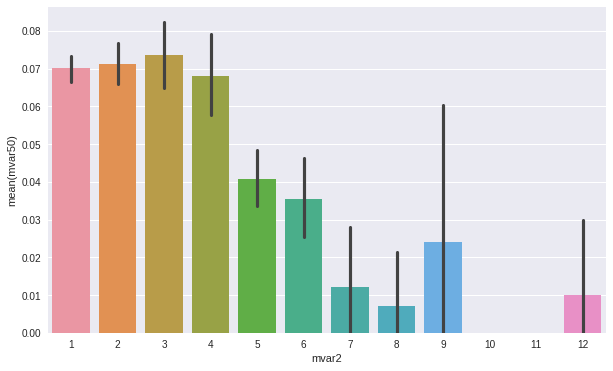

In [9]:
sns.barplot(data=train,x=train.mvar2,y=train.mvar50)

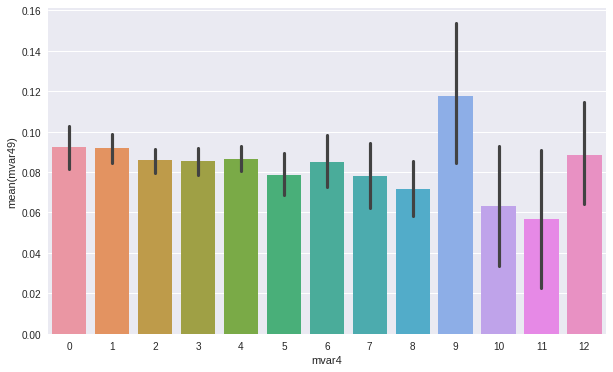

In [103]:
sns.barplot(data=train,x='mvar4',y='mvar49')

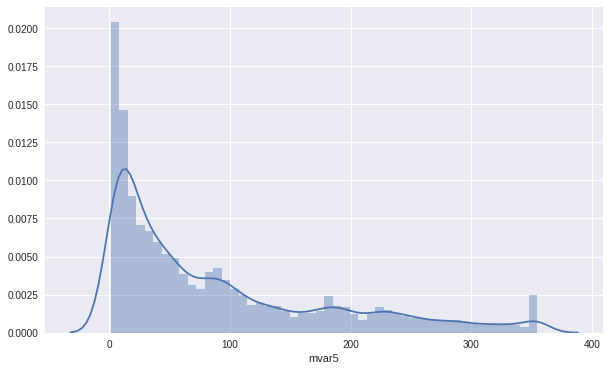

In [10]:
sns.distplot(train.mvar5)

In [40]:
(train.mvar5<24).sum()

12728

In [12]:
df_1=train[train.mvar5<48]

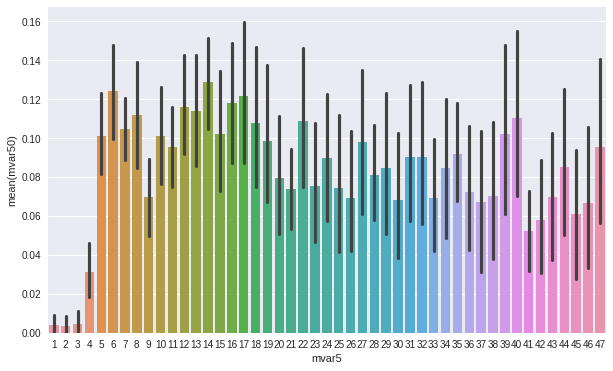

In [15]:
sns.barplot(x=df_1.mvar5,y=df_1.mvar50)

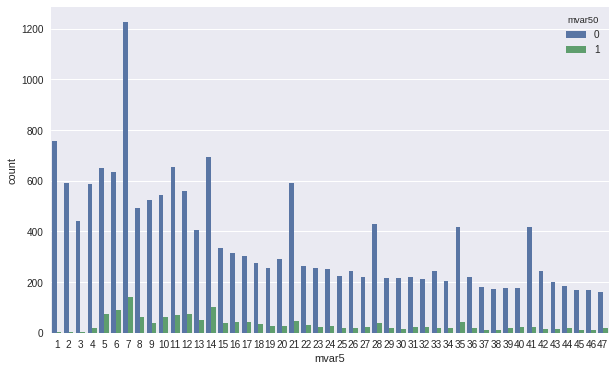

In [58]:
sns.countplot(x=df_1.mvar5,hue=df_1.mvar50)

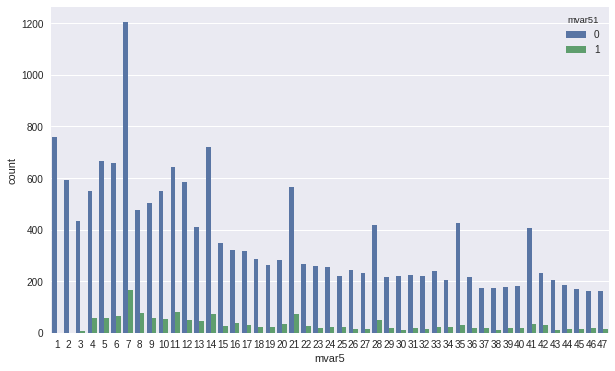

In [59]:
sns.countplot(x=df_1.mvar5,hue=df_1.mvar51)

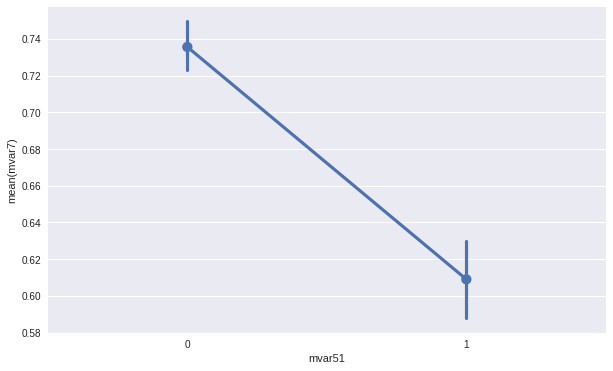

In [20]:
sns.pointplot(data=train,x="mvar51",y='mvar7')

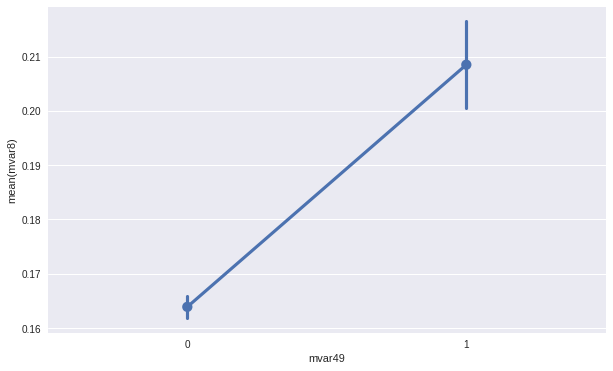

In [24]:
sns.pointplot(data=train,x='mvar49',y='mvar8')

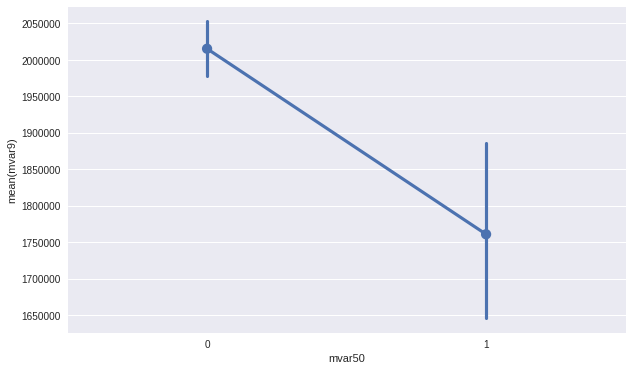

In [27]:
sns.pointplot(data=train,x='mvar50',y='mvar9')

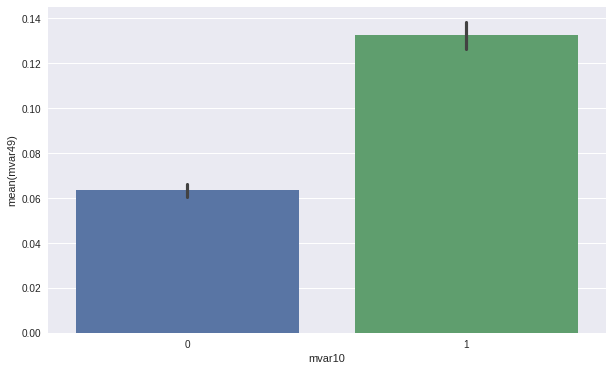

In [86]:
sns.barplot(data=train,x='mvar10',y='mvar49')

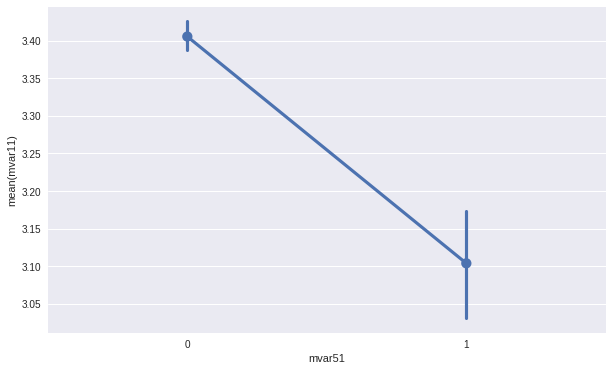

In [30]:
sns.pointplot(data=train,x='mvar51',y='mvar11')

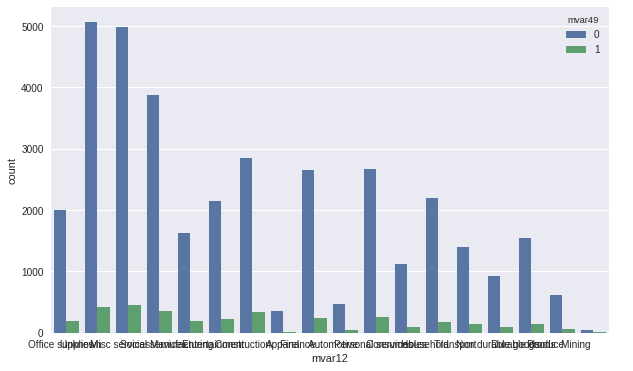

In [94]:
sns.countplot(data=train,x='mvar12',hue='mvar49')

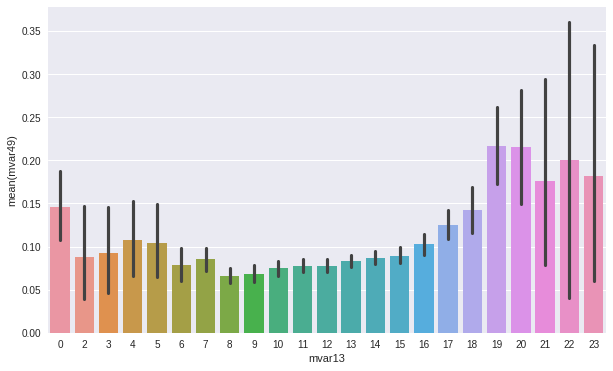

In [95]:
sns.barplot(data=train,x='mvar13',y='mvar49')

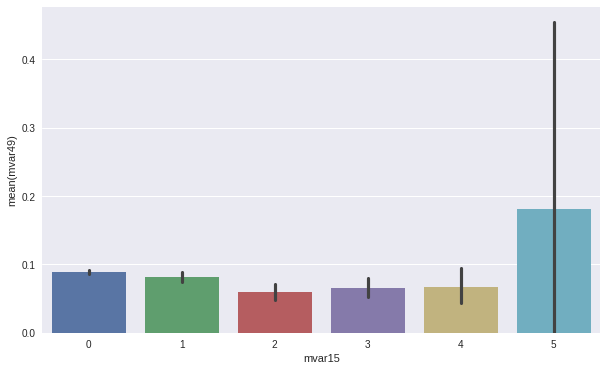

In [118]:
sns.barplot(data=train,x='mvar15',y='mvar49')

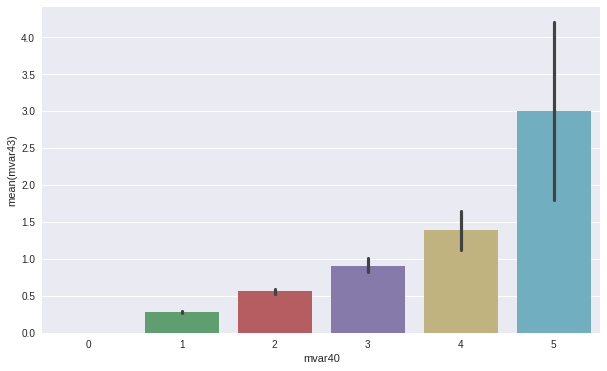

In [143]:
sns.barplot(data=train,x='mvar40',y='mvar43')

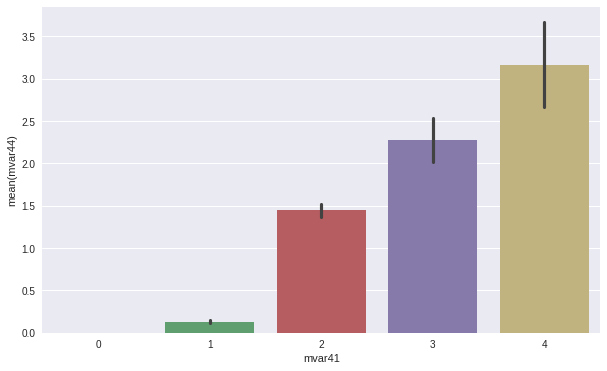

In [147]:
sns.barplot(data=train,x='mvar41',y='mvar44')

/home/harshitssj4/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


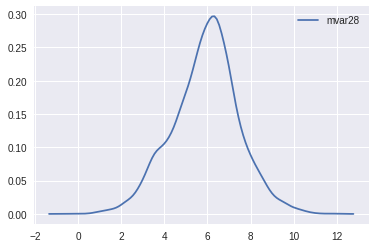

In [373]:
sns.kdeplot(np.log(train['mvar28']))